In [41]:
# Including required python libraries used in this project
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # To remove warnings from pandas
import emoji

from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, SimpleRNN,LSTM, Activation
from keras.utils import np_utils

import matplotlib.pyplot as plt

In [42]:
# Loading the dataset
train = pd.read_csv('train_emoji.csv',header=None)
test = pd.read_csv('test_emoji.csv',header=None)

In [43]:
# Checking data by showing first 5 rows of the train data
train.head()

,0,1,2,3
0,never talk to me again,3,NaN,NaN
1,I am proud of your achievements,2,NaN,NaN
2,It is the worst day in my life,3,NaN,NaN
3,Miss you so much,0,NaN,[0]
4,food is life,4,NaN,NaN


In [44]:
# Checking data by showing first 5 rows of the test data
test.head()

,0,1
0,I want to eat\t,4
1,he did not answer\t,3
2,he got a raise\t,2
3,she got me a present\t,0
4,ha ha ha it was so funny\t,2


In [45]:
# Creating dictionary for some emoji's, consisting of key - number and value - emoji 
emoji_dict = { 0 : ":heart:", 1 : ":baseball:", 2 : ":smile:", 3 : ":disappointed:", 4 : ":fork_and_knife:"}

In [46]:
# Printing each emoji icon by emojizing each emoji
for index in emoji_dict.keys():
    print (index,end=" ")
    print (emoji.emojize(emoji_dict[index], use_aliases=True))

0 ❤
1 ⚾
2 😄
3 😞
4 🍴


In [47]:
# Creating training and testing data
X_train = train[0]
Y_train = train[1]

X_test = test[0]
Y_test = test[1]

print (X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
print ("-------------------------")
print (X_train[0],Y_train[0])

(132,) (132,) (56,) (56,)
-------------------------
never talk to me again 3


In [48]:
# Splitting the train data from sentences to words
for ix in range(X_train.shape[0]):
    X_train[ix] = X_train[ix].split()

# Splitting the test data from sentences to words
for ix in range(X_test.shape[0]):
    X_test[ix] = X_test[ix].split()
    
# Converting labels into categorical form
Y_train = np_utils.to_categorical(Y_train)

In [49]:
# Now checking the above conversion by printing train and test data at 0th index
print (X_train[0],Y_train[0])

['never', 'talk', 'to', 'me', 'again'] [0. 0. 0. 1. 0.]


In [50]:
# To check maximum length of sentence in training data
np.unique(np.array([len(ix) for ix in X_train]) , return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 4,  5, 26, 35, 20, 21, 11,  5,  1,  4], dtype=int64))

In [51]:
# To check maximum length of senetence in testing data
np.unique(np.array([len(ix) for ix in X_test]) , return_counts=True)

(array([2, 3, 4, 5, 6, 7, 8]),
 array([ 3, 12, 16, 17,  3,  4,  1], dtype=int64))

In [52]:
# Creating  embeddings dictionary with key = word and value = list of words in glove vector
embeddings_index = {}

f = open('glove.6B.50d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [53]:
# Checking length of a particular word
embeddings_index["i"].shape

(50,)

In [54]:
from scipy import spatial
# Checking cosine similarity of similar words
spatial.distance.cosine(embeddings_index["happy"], embeddings_index["sad"])

0.31093674898147583

In [55]:
# Filling the embedding matrix
embedding_matrix_train = np.zeros((X_train.shape[0], 10, 50))
embedding_matrix_test = np.zeros((X_test.shape[0], 10, 50))

for ix in range(X_train.shape[0]):
    for ij in range(len(X_train[ix])):
        embedding_matrix_train[ix][ij] = embeddings_index[X_train[ix][ij].lower()]
        
for ix in range(X_test.shape[0]):
    for ij in range(len(X_test[ix])):
        embedding_matrix_test[ix][ij] = embeddings_index[X_test[ix][ij].lower()]        

In [56]:
print (embedding_matrix_train.shape, embedding_matrix_test.shape)

(132, 10, 50) (56, 10, 50)


# Training model

## - Using RNN

In [57]:
# A simple RNN network to classify the emoji class from an input Sentence

model = Sequential()
model.add(SimpleRNN(64, input_shape=(10,50), return_sequences=True))
model.add(Dropout(0.5))
model.add(SimpleRNN(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 10, 64)            7360      
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 64)            0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 325       
_________________________________________________________________
activation_2 (Activation)    (None, 5)                 0         
Total params: 15,941
Trainable params: 15,941
Non-trainable params: 0
__________________________________________________

In [58]:
# Setting Loss and Optimiser for the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
# Training of the model and Setting hyperparameters for the model
hist = model.fit(embedding_matrix_train,Y_train,
                epochs = 50, batch_size=32,shuffle=True
                )

Epoch 1/50
5/5 [==============================] - 0s 5ms/step - loss: 1.9316 - accuracy: 0.2273
Epoch 2/50
5/5 [==============================] - 0s 5ms/step - loss: 1.6549 - accuracy: 0.3258
Epoch 3/50
5/5 [==============================] - 0s 22ms/step - loss: 1.6163 - accuracy: 0.2879
Epoch 4/50
5/5 [==============================] - 0s 36ms/step - loss: 1.6076 - accuracy: 0.3788
Epoch 5/50
5/5 [==============================] - 0s 50ms/step - loss: 1.4532 - accuracy: 0.3939
Epoch 6/50
5/5 [==============================] - 0s 37ms/step - loss: 1.3347 - accuracy: 0.4394
Epoch 7/50
5/5 [==============================] - 0s 34ms/step - loss: 1.3646 - accuracy: 0.4015
Epoch 8/50
5/5 [==============================] - 0s 38ms/step - loss: 1.3880 - accuracy: 0.4167
Epoch 9/50
5/5 [==============================] - 0s 43ms/step - loss: 1.1826 - accuracy: 0.4697
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 1.2015 - accuracy: 0.47 - 0s 37ms/step - loss: 1.2030 - accura

In [60]:
# Prediction of the trained model 
pred = model.predict_classes(embedding_matrix_test)
print(type(pred))

<class 'numpy.ndarray'>


### ACCURACY

In [61]:
# Calculating the accuracy of the algorithm
float(sum(pred==Y_test))/embedding_matrix_test.shape[0]

0.5

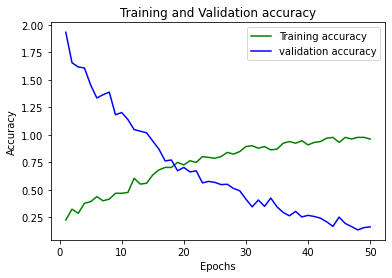

In [62]:
# history_dict = history.history
# print(history_dict.keys())
loss_train = hist.history['accuracy']
loss_val = hist.history['loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [63]:
# Printing the sentences with the predicted and labled emoji
for ix in range(embedding_matrix_test.shape[0]):
    
    if pred[ix] != Y_test[ix]:
        print(ix)
        print (test[0][ix],end=" ")
        print (emoji.emojize(emoji_dict[pred[ix]], use_aliases=True),end=" ")
        print (emoji.emojize(emoji_dict[Y_test[ix]], use_aliases=True))

2
['he', 'got', 'a', 'raise'] 😞 😄
3
['she', 'got', 'me', 'a', 'present'] 😄 ❤
5
['he', 'is', 'a', 'good', 'friend'] 😄 ❤
6
['I', 'am', 'upset'] 😞 ❤
7
['We', 'had', 'such', 'a', 'lovely', 'dinner', 'tonight'] 🍴 ❤
9
['Stop', 'making', 'this', 'joke', 'ha', 'ha', 'ha'] 😞 😄
11
['work', 'is', 'hard'] ❤ 😞
12
['This', 'girl', 'is', 'messing', 'with', 'me'] 😄 😞
13
['are', 'you', 'serious', 'ha', 'ha'] 🍴 😄
17
['Congratulation', 'for', 'having', 'a', 'baby'] 😞 😄
18
['stop', 'messing', 'around'] ❤ 😞
21
['you', 'brighten', 'my', 'day'] 🍴 😄
23
['she', 'is', 'a', 'bully'] ❤ 😞
26
['I', 'worked', 'during', 'my', 'birthday'] 😄 😞
27
['My', 'grandmother', 'is', 'the', 'love', 'of', 'my', 'life'] 😞 ❤
28
['enjoy', 'your', 'break'] ❤ 😄
29
['valentine', 'day', 'is', 'near'] 😄 ❤
30
['I', 'miss', 'you', 'so', 'much'] 😞 ❤
34
['will', 'you', 'be', 'my', 'valentine'] 😞 ❤
35
['he', 'can', 'pitch', 'really', 'well'] 😞 ⚾
41
['I', 'like', 'your', 'jacket'] ❤ 😄
45
['I', 'love', 'to', 'the', 'stars', 'and', 'back'] ⚾ ❤
4

In [64]:
# Predicting for our random sentence
x = ['lets', 'have', 'dinner']

x_ = np.zeros((1,10,50))

for ix in range(len(x)):
    x_[0][ix] = embeddings_index[x[ix].lower()]

In [65]:
model.predict_classes(x_)

array([4], dtype=int64)

##  - Using LSTM

In [66]:
# A simple LSTM network
model = Sequential()
model.add(LSTM(128, input_shape=(10,50), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 10, 128)           91648     
_________________________________________________________________
dropout_6 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 645       
_________________________________________________________________
activation_3 (Activation)    (None, 5)                 0         
Total params: 223,877
Trainable params: 223,877
Non-trainable params: 0
________________________________________________

In [67]:
# Setting Loss ,Optimiser for model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
# Training model
history = model.fit(embedding_matrix_train,Y_train,
                epochs = 50, batch_size=32,shuffle=True
                )

Epoch 1/50
5/5 [==============================] - 0s 14ms/step - loss: 1.5913 - accuracy: 0.2576
Epoch 2/50
5/5 [==============================] - 0s 14ms/step - loss: 1.5112 - accuracy: 0.3258
Epoch 3/50
5/5 [==============================] - 0s 13ms/step - loss: 1.4970 - accuracy: 0.3561
Epoch 4/50
5/5 [==============================] - 0s 71ms/step - loss: 1.4235 - accuracy: 0.4242
Epoch 5/50
5/5 [==============================] - 1s 110ms/step - loss: 1.3202 - accuracy: 0.5455
Epoch 6/50
5/5 [==============================] - 1s 115ms/step - loss: 1.1864 - accuracy: 0.5682
Epoch 7/50
5/5 [==============================] - 1s 128ms/step - loss: 1.0243 - accuracy: 0.6288
Epoch 8/50
5/5 [==============================] - 1s 110ms/step - loss: 0.9056 - accuracy: 0.6894
Epoch 9/50
5/5 [==============================] - 1s 115ms/step - loss: 0.8156 - accuracy: 0.6970
Epoch 10/50
5/5 [==============================] - 1s 130ms/step - loss: 0.7298 - accuracy: 0.6894
Epoch 11/50
5/5 [======

In [69]:
# Prediction of trained model
pred = model.predict_classes(embedding_matrix_test)
# print(pred)
# print (pred.shape, embedding_matrix_test.shape, Y_test.shape)
# print(Y_test)

### ACCURACY

In [70]:
# Calculating accuracy / score  of the model
float(sum(pred==Y_test))/embedding_matrix_test.shape[0]

0.625

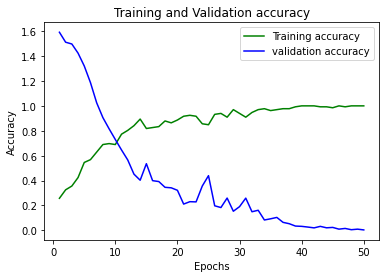

In [71]:
# history_dict = history.history
# print(history_dict.keys())
loss_train = history.history['accuracy']
loss_val = history.history['loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [72]:
# Printing the sentences with the predicted and the labelled emoji
for ix in range(embedding_matrix_test.shape[0]):
    
    if pred[ix] != Y_test[ix]:
        print(ix)
        print (test[0][ix],end=" ")
        print (emoji.emojize(emoji_dict[pred[ix]], use_aliases=True),end=" ")
        print (emoji.emojize(emoji_dict[Y_test[ix]], use_aliases=True))

2
['he', 'got', 'a', 'raise'] 😞 😄
5
['he', 'is', 'a', 'good', 'friend'] 😄 ❤
6
['I', 'am', 'upset'] 😞 ❤
7
['We', 'had', 'such', 'a', 'lovely', 'dinner', 'tonight'] 😄 ❤
11
['work', 'is', 'hard'] 😄 😞
12
['This', 'girl', 'is', 'messing', 'with', 'me'] ❤ 😞
13
['are', 'you', 'serious', 'ha', 'ha'] 😞 😄
16
['work', 'is', 'horrible'] 😄 😞
19
['any', 'suggestions', 'for', 'dinner'] 😄 🍴
21
['you', 'brighten', 'my', 'day'] ❤ 😄
23
['she', 'is', 'a', 'bully'] ❤ 😞
26
['I', 'worked', 'during', 'my', 'birthday'] 😄 😞
28
['enjoy', 'your', 'break'] ⚾ 😄
29
['valentine', 'day', 'is', 'near'] 😄 ❤
32
['My', 'life', 'is', 'so', 'boring'] ❤ 😞
40
['I', 'will', 'go', 'dance'] ⚾ 😄
41
['I', 'like', 'your', 'jacket'] ❤ 😄
45
['I', 'love', 'to', 'the', 'stars', 'and', 'back'] 😄 ❤
48
['I', 'want', 'to', 'joke'] 😞 😄
49
['go', 'away'] ⚾ 😞
55
['I', 'did', 'not', 'have', 'breakfast'] 🍴 😞
